In [140]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

tag_id = preprocessing.LabelEncoder()
genre_id = preprocessing.LabelEncoder()

data = pd.read_csv("data.csv").dropna()

tag_id.fit(data.tag)
genre_id.fit(data.genre)
data.tag = tag_id.transform(data.tag)
data.genre = genre_id.transform(data.genre)
data.drop("Unnamed: 0",axis = 1, inplace=True)
data.drop_duplicates(inplace=True)
data.shape

(87560, 7)

In [141]:
y = data.genre.as_matrix()

In [142]:
X = data[["id", "user_id", "genre" , "tag", "followee_id", "playback_count", "likes"]].as_matrix()

In [143]:
print("There are",  len(genre_id.classes_) , "genres")

There are 41 genres


In [144]:
len(set(y))

41

In [148]:
from megaman.embedding import (Isomap, LocallyLinearEmbedding,
                               LTSA, SpectralEmbedding)
from megaman.geometry import Geometry

n_components = 3
radius = 10
affinity_method = 'gaussian'
affinity_kwds = {'radius':radius}
adjacency_kwds = {'radius':radius}
geom = Geometry(affinity_kwds=affinity_kwds, adjacency_kwds= adjacency_kwds)

spectral = SpectralEmbedding(n_components=n_components, eigen_solver='arpack',geom=geom, drop_first=False) # use 3 for spectral
embed_spectral = spectral.fit_transform(X)

/Users/omarkhan/anaconda3/lib/python3.5/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/omarkhan/anaconda3/lib/python3.5/site-packages/megaman/embedding/spectral_embedding.py:180: UserWarning: Graph is not fully connected: spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected: "


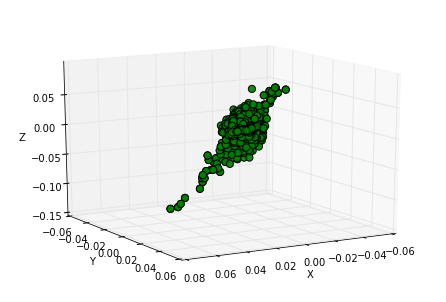

In [149]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-0.005, 0.005)
ax3d = Axes3D(fig)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.view_init(elev=15., azim=60)
labels = [y_ for y_ in y if y_ == 0 or y_ == 8 or y_ == 18 or y_ == 26 or y_ == 12]

colors = ['orange' if y == 0 else 'lightblue' if y ==8 else 'red' if y == 18 else 'green' if y == 26 else 'purple' for y in labels]

ax3d.scatter(embed_spectral[:, 1], embed_spectral[:, 0] , embed_spectral[:, 2], c=colors, s=50, alpha=0.7)

In [150]:
embed_spectral.shape

(87560, 3)

In [151]:
pd.concat([data,pd.DataFrame(columns=list('xyz'))])

,followee_id,genre,id,likes,playback_count,tag,user_id,x,y,z
0,34242712.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
1,6349040.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
2,18217449.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
3,10494998.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
4,14449884.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
5,44663681.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
6,58879381.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
7,1681027.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
8,35225382.0,26.0,146341923.0,295946.0,17147549.0,2866.0,1377057.0,NaN,NaN,NaN
9,34242712.0,26.0,146341923.0,295946.0,17147549.0,2865.0,1377057.0,NaN,NaN,NaN


In [152]:
data.x = embed_spectral[:, 0]
data.y = embed_spectral[:, 1]
data.z = embed_spectral[:, 2]

In [157]:
data = data[[""]]

/Users/omarkhan/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices